# <center>L2 Computational Physics</center>

## <center>Week 3: Differential Equations I</center>

In [1]:
# usual packages to import
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

In this notebook, you will generate and plot the decay curve for Iodine-133 analytically and numerically. $^{133}\textrm{I}$ has a half life $t_{1/2}$ of 20.8 hours. This means that half of the nuclei will have decayed after time $t_{1/2}$. Derive the mean lifetime $\tau$ from that information.

In [2]:
# define a function to calculate the mean lifetime from the half life
def meanLifetime(halfLife):
    return halfLife/numpy.log(2)

T_HALF = 20.8
TAU = meanLifetime(T_HALF)


Check your average lifetime:

In [3]:
# this test is worth 1 mark
assert numpy.isclose(TAU, 30.0080568505)         

### The Decay Equation

Implement the function `f_rad` such that the differential equation 

$$ \frac{dN}{dt} = f_{rad}(N,t)$$

describes the radioactive decay process.

- *Your function should return values using hours as the time unit.*
- *The function should use the constant* `TAU`.

In [4]:
def f_rad(N, t):
    return -(N/TAU)

Make sure your function works:

In [5]:
# this test cell is worth 1 mark
assert numpy.isclose(f_rad(1000, 0), -33.324383681)           

Solve this first order, ordinary differential equation analytically. Implement this function below, naming it `analytic`. The function should take an initial number of atoms `N0` at time `t=0`, and a time argument. The function should return nuclei count at the time argument. Make sure the function also works for numpy arrays.

In [6]:
def analytic(N0, t):
    return N0*numpy.exp(-t/TAU)

Check your answer for a single time:

In [7]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, 41.6), 250.0)           

In [8]:
# this test is worth 1 mark
assert numpy.isclose(analytic(1000, numpy.arange(0, 60, 6)), 
                     [1000.        ,  818.77471839,  670.39203948,  548.90005334,
                       449.4254866 ,  367.97822623,  301.29126855,  246.68967356,
                       201.983268  ,  165.37879338]).all()


## Numerically Solving the ODE

We now wish to solve our differential equation numerically. We shall do this using Euler's and RK4 methods.

### Euler's Method

Create a function which takes as its arguments the initial number of atoms, `n0`, the initial time `t0`, the time step, `dt`, and the number of steps to perform, `n_steps`.  This function should return an array of the number of counts at each time step using Euler's method. This array should contain the initial and final values, so the array length should be `n_steps+1` 

In [9]:
def solve_euler(f, n0, t0, dt, n_panels):
    n_array= numpy.zeros(n_panels+1)
    x=n0
    n_array[0]=x
    for i in range(1,(n_panels+1)):
        x=x+dt*f(x,i*dt)
        n_array[i]=x
    
    return n_array


Try your solution:

In [10]:
# this test is worth 1 mark
assert len(solve_euler(f_rad, 1000, 0, 1, 17)) == 18

In [11]:
# this test is worth 2 marks
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 1), [1000.,  800.05369792]).all()

In [12]:
# this test is worth 2 mark
assert numpy.isclose(solve_euler(f_rad, 1000, 0, 6, 10), [1000.        ,  800.05369792,  640.08591955,  512.10310692,
                                                409.7099844 ,  327.7899881 ,  262.24959212,  209.81375595,
                                                167.86227132,  134.29883091,  107.4462763 ]).all()

### RK 4 method

Implement the RK4 method in the `solve_RK4` function. The arguments are the same as for `solve_euler`.

In [13]:
def solve_RK4(f, n0, t0, dt, nsteps):
    
    array=numpy.zeros(nsteps+1)
    n=n0
    t=t0
    
    array[0]=n
    
    for i in range(1,(nsteps+1)):
        k1=f(n,t)
        k2=f(n+dt/2*k1,t)
        k3=f(n+dt/2*k2,t)
        k4=f(n+dt*k3,t)
        
        n=n+dt*(k1+2*k2+2*k3+k4)/6
        array[i]=n
    
    return array

solve_RK4(f_rad, 1000, 0, 6, 10)

array([1000.        ,  818.77729521,  670.39625915,  548.90523578,
        449.43114428,  367.9840167 ,  301.29695787,  246.69510822,
        201.98835345,  165.3834777 ,  135.41223655])

In [14]:
# This checks that we return an array of the right length
# this test is worth 1 mark
assert len(solve_RK4(f_rad, 1000, 0, 1, 17)) == 18

In [15]:
# This checks that a single step is working
# this test is worth 2 mark
assert numpy.isclose(solve_RK4(f_rad, 1000,0, 6, 1), [1000.,  818.7773]).all()

In [16]:
# This checks multiple steps
# this test is worth 2 marks
assert numpy.isclose(solve_RK4(f_rad, 1000, 0, 6, 10), [
    1000.,
    818.77729521,  
    670.39625915,  
    548.90523578,
    449.43114428,  
    367.9840167,  
    301.29695787,  
    246.69510822, 
    201.98835345,  
    165.3834777,  
    135.41223655]).all()

## Plotting task

**Task 1: **

Create a plot to show that the RK4 method has an error that scales better with the number of steps than the Euler method. (click on the "+" button to create new cells.)       [task worth 5 marks]


[7.12537359e+02 1.83669988e+02 3.37346646e+01 6.19604547e+00
 1.13802760e+00 2.09021516e-01 3.83909794e-02 1.29510682e-03]
[10. 10. 10. 10. 10. 10. 10. 10.]
[7.16595443e+02 1.88960144e+02 3.57059359e+01 6.74699877e+00
 1.27491386e+00 2.40907906e-01 4.55219924e-02 1.62540534e-03]


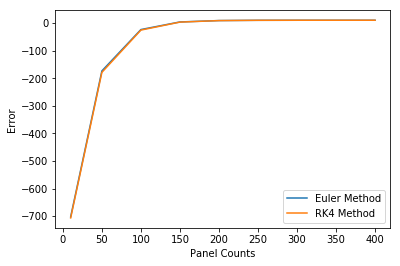

In [21]:
panel_counts = [10,50,100,150,200,250,300,400]

a=numpy.zeros(len(panel_counts))
e=numpy.zeros(len(panel_counts))
r=numpy.zeros(len(panel_counts))


for i in range(0,len(panel_counts)):
    a[i]=analytic(10,0)
    eul=solve_euler(f_rad, 1000, 0, 1, panel_counts[i])
    e[i]=eul[-1]
    rk=solve_RK4(f_rad, 1000, 0, 1, panel_counts[i])
    r[i]=rk[-1]
  
print(e)
print(a)
print(r)
eul_er=a-e
rk_er=a-r

plt.plot(panel_counts,eul_er, label="Euler Method")
plt.plot(panel_counts, rk_er,label="RK4 Method")
plt.xlabel("Panel Counts")
plt.ylabel("Error")
plt.legend()
plt.show()

[1000.          966.67561632  934.46174719  903.32138539  873.21875695
  844.11928006  815.9895253   788.79717728  762.5109975   737.10078846
  712.53735897  688.79249063  665.8389054   643.65023424  622.20098688
  601.46652247  581.4230213   562.04745746  543.31757234  525.2118491
  507.70948793  490.79038215  474.43509515  458.62483801  443.34144794
  428.56736743  414.28562404  400.47981095  387.13406808  374.23306386
  361.76197765  349.70648271  338.0527297   326.78733083  315.89734444
  305.37026013  295.19398441  285.35682682  275.84748644  266.65503896
  257.76892413  249.1789336   240.87519921  232.84818166  225.08865951
  217.58771866  210.33674204  203.32739974  196.55163946  190.00167722
  183.66998842  177.54929926  171.63257829  165.9130284   160.38407898
  155.0393784   149.87278667  144.87836842  140.05038608  135.38329328
  130.87172847  126.51050878  122.29462405  118.21923107  114.27964806
  110.47134922  106.78995959  103.23125001   99.79113222   96.46565424
   93.2

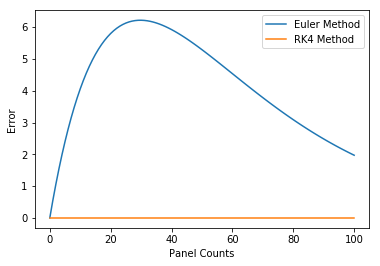

In [28]:
panel_counts = numpy.linspace(0,100,101)



e=solve_euler(f_rad, 1000, 0, 1, 100)

r=solve_RK4(f_rad, 1000, 0, 1, 100)
 
a=numpy.zeros(len(e))    
for i in range(0,len(e)):
    a[i]=analytic(1000,panel_counts[i])
        
  
print(e)
print(a)
print(r)
eul_er=a-e
rk_er=a-r

plt.plot(panel_counts,eul_er, label="Euler Method")
plt.plot(panel_counts, rk_er,label="RK4 Method")
plt.xlabel("Panel Counts")
plt.ylabel("Error")
plt.legend()
plt.show()